### линейная регрессия

In [13]:
%matplotlib inline 
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


sns.set()

<IPython.core.display.Javascript object>


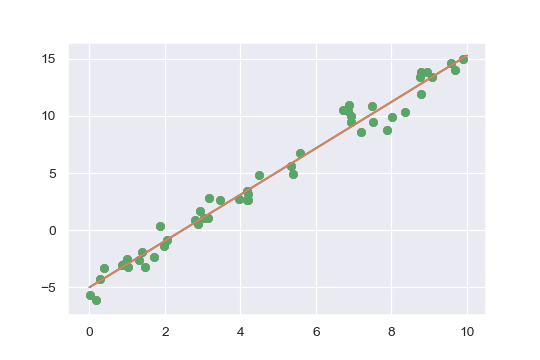

In [14]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50) 
y = 2 * x - 5 + rng.randn(50)

plt.scatter(x, y);

<IPython.core.display.Javascript object>


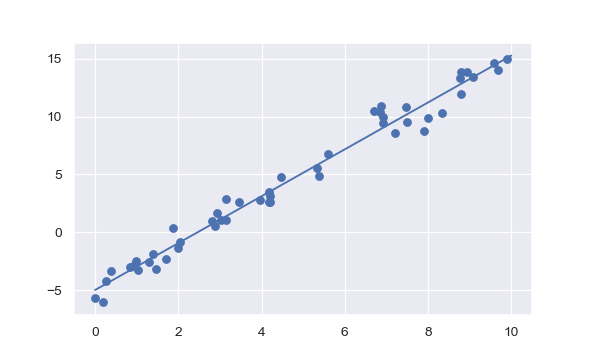

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

Подбираемые параметры модели (в библиотеке Scikit-Learn всегда содержат в конце знак подчеркивания) включают угловой коэффициент и точку пересечения с осью координат. В данном случае соответствующие параметры — coef_ и intercept_:

In [4]:
print("Model slope: ", model.coef_[0])
print("Model intercept: ", model.intercept_)

Model slope:  2.0272088103606944
Model intercept:  -4.9985770855532


In [5]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)

print(np.shape(y))
print(model.intercept_)
print(model.coef_)


(100,)
0.50000000000001
[ 1.5 -2.   1. ]


In [6]:
new_x = np.linspace(0, 10, 100)
nx2 = new_x.copy()
nx3 = new_x.copy()

dffit3d = pd.DataFrame.from_dict({'x1': new_x, 'x2':nx2, 'x3':nx3})

y3dfit = model.predict(dffit3d)

dffit3d['y']=y3dfit

<IPython.core.display.Javascript object>


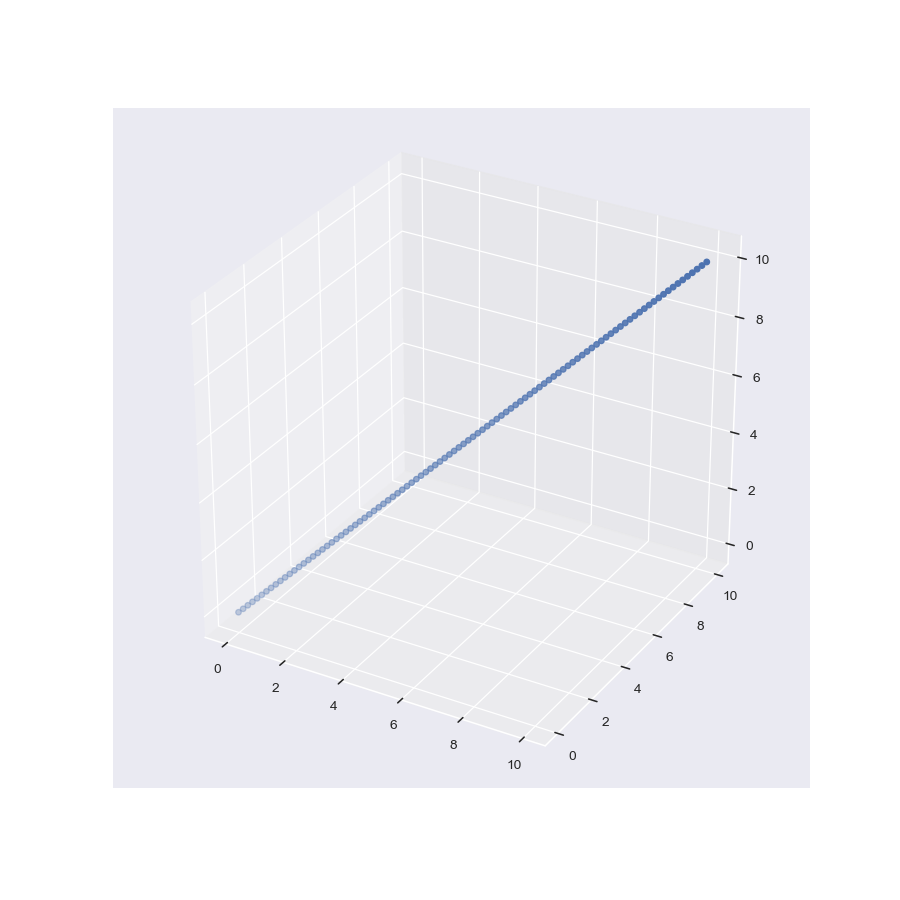

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dffit3d['x1'], dffit3d['x2'], dffit3d['x3'])

In [8]:
dffit3d.head()

,x1,x2,x3,y
0,0.00000,0.00000,0.00000,0.500000
1,0.10101,0.10101,0.10101,0.550505
2,0.20202,0.20202,0.20202,0.601010
3,0.30303,0.30303,0.30303,0.651515
4,0.40404,0.40404,0.40404,0.702020


In [19]:
from sklearn.preprocessing import PolynomialFeatures

x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [10]:
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

<IPython.core.display.Javascript object>


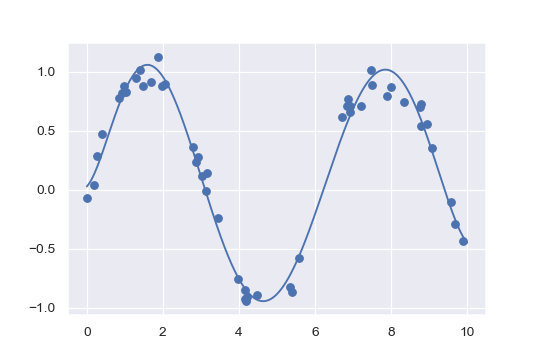

In [21]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Равномерно распределенные Гауссовы признаки для одномерных входных данных"""
    def __init__(self, N, width_factor=2.0): 
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod 
    def _gauss_basis(x, y, width, axis=None): 
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, y=None):
    # Создаем N центров, распределенных по всему диапазону данных 
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor *(self.centers_[1] - self.centers_[0]) 
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)
    
    


<IPython.core.display.Javascript object>


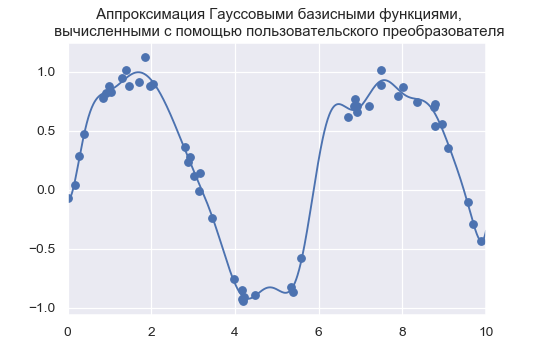

In [26]:
gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())

gauss_model.fit(x[:, np.newaxis], y) 

yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);
plt.title(' Аппроксимация Гауссовыми базисными функциями,\n вычисленными с помощью пользовательского преобразователя');

### Регуляризация

<IPython.core.display.Javascript object>


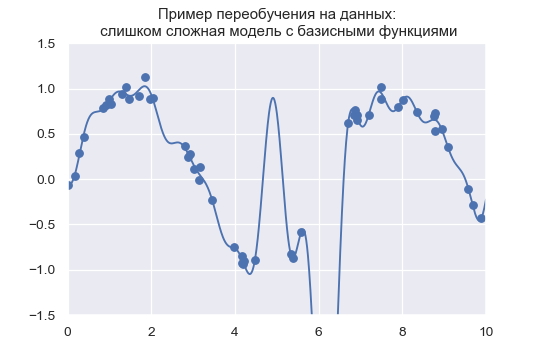

In [29]:
model = make_pipeline(GaussianFeatures(30),
                LinearRegression())

model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10) 
plt.ylim(-1.5, 1.5);
plt.title('Пример переобучения на данных:\n слишком сложная модель с базисными функциями');

<IPython.core.display.Javascript object>


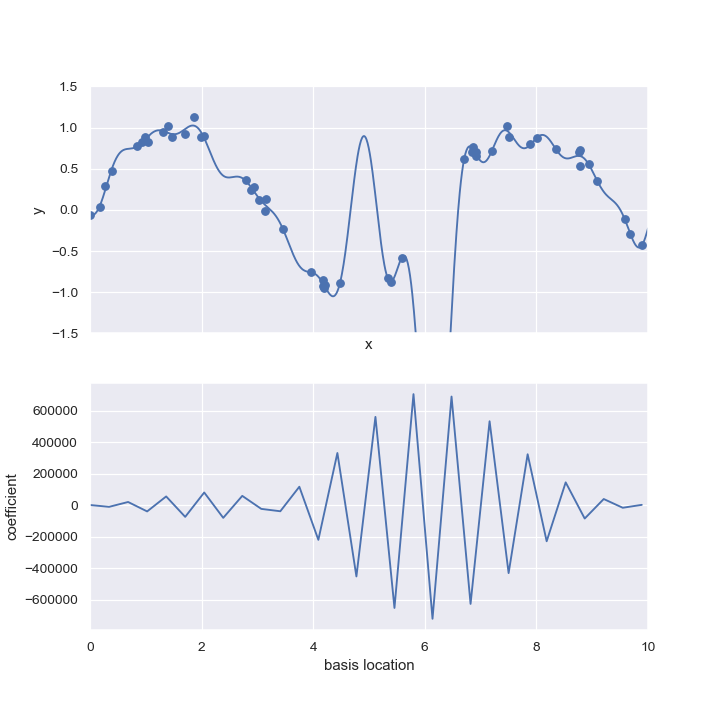

In [32]:
def basis_plot(model, title=None): 
    fig, ax = plt.subplots(2, sharex=True, figsize=(8,8)) 
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis])) 
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    if title:
        ax[0].set_title(title) 
    ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location', # Базовое местоположение 
              ylabel='coefficient', # Коэффициент 
              xlim=(0, 10))

    
model = make_pipeline(GaussianFeatures(30), LinearRegression())

basis_plot(model)